In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

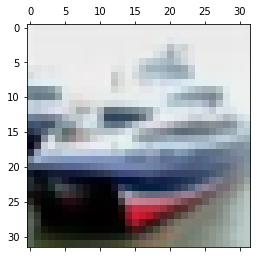

In [5]:
plt.matshow(x_test[1])

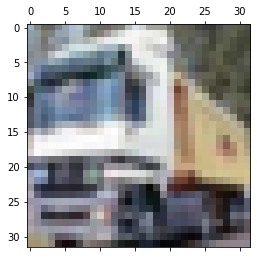

In [6]:
plt.matshow(x_train[1])

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
model = keras.models.Sequential()

inputs = keras.Input(shape=(32*32*3,))
x = layers.Dense(600, activation="relu", name="dense_1")(inputs)
x = layers.Dense(600, activation="relu", name="dense_2")(x)
x = layers.Dense(600, activation="relu", name="dense_3")(x)
outputs = layers.Dense(50, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
x_train = x_train.reshape(50000, 3072, -1).astype("float32") / 255
x_test = x_test.reshape(10000, 3072, -1).astype("float32") /255

In [10]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 600)               1843800   
_________________________________________________________________
dense_2 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_3 (Dense)              (None, 600)               360600    
_________________________________________________________________
predictions (Dense)          (None, 50)                30050     
Total params: 2,595,050
Trainable params: 2,595,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras import optimizers

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adamax(learning_rate=0.001),
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

Using TensorFlow backend.


In [13]:
model.fit(x_train,y_train, epochs = 20, batch_size=64)

Epoch 1/20
782/782 [==============================] - 21s 26ms/step - loss: 1.8501 - sparse_categorical_accuracy: 0.3359
Epoch 2/20
782/782 [==============================] - 21s 26ms/step - loss: 1.6333 - sparse_categorical_accuracy: 0.4163
Epoch 3/20
782/782 [==============================] - 21s 26ms/step - loss: 1.5400 - sparse_categorical_accuracy: 0.4502
Epoch 4/20
782/782 [==============================] - 21s 26ms/step - loss: 1.4800 - sparse_categorical_accuracy: 0.4698
Epoch 5/20
782/782 [==============================] - 21s 26ms/step - loss: 1.4274 - sparse_categorical_accuracy: 0.4891
Epoch 6/20
782/782 [==============================] - 21s 27ms/step - loss: 1.3751 - sparse_categorical_accuracy: 0.5090
Epoch 7/20
782/782 [==============================] - 21s 26ms/step - loss: 1.3346 - sparse_categorical_accuracy: 0.5237
Epoch 8/20
782/782 [==============================] - 21s 26ms/step - loss: 1.2899 - sparse_categorical_accuracy: 0.5416
Epoch 9/20
782/782 [============

In [14]:
x_test.shape

(10000, 3072, 1)

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4256 - sparse_categorical_accuracy: 0.5383


[1.4255855083465576, 0.5382999777793884]

In [16]:
y_pred = model.predict(x_test)

In [17]:
y_pred = np.array(y_pred)

In [18]:
y_pred

array([[4.82837204e-03, 2.63626711e-03, 1.11349337e-02, ...,
        4.02784250e-17, 2.32264269e-16, 9.92548112e-17],
       [9.56625305e-03, 1.08875327e-01, 1.36186304e-02, ...,
        2.07936572e-15, 8.73717534e-15, 3.13105051e-15],
       [4.62793559e-01, 1.38873234e-01, 9.91459005e-04, ...,
        1.32969200e-12, 5.89751598e-12, 1.36063806e-12],
       ...,
       [6.48364052e-03, 1.59552146e-05, 3.16033214e-01, ...,
        2.02665487e-17, 9.47261512e-18, 8.77197246e-18],
       [1.13099557e-03, 1.69930754e-05, 1.04344515e-02, ...,
        2.63434410e-17, 1.07148860e-16, 8.91248266e-17],
       [7.14677060e-03, 7.88352045e-04, 2.53928844e-02, ...,
        1.97499365e-13, 2.47455268e-13, 6.45171037e-14]], dtype=float32)

In [19]:
y_pred.shape

(10000, 50)

In [20]:
y_pred[1]

array([9.56625305e-03, 1.08875327e-01, 1.36186304e-02, 7.11120549e-04,
       2.74425722e-04, 2.97651190e-04, 2.07447792e-05, 6.50164671e-04,
       7.91677594e-01, 7.43080005e-02, 1.61209936e-14, 6.07097905e-15,
       3.76968794e-14, 3.86348541e-15, 1.57182041e-14, 3.17752111e-14,
       1.33878377e-14, 1.00772026e-14, 2.09838742e-14, 3.19793647e-15,
       6.27680001e-15, 1.11790036e-14, 9.94829439e-15, 1.69018767e-14,
       1.06577251e-14, 2.39752040e-15, 4.23077965e-15, 5.88886528e-15,
       2.43200820e-15, 2.18418033e-14, 7.74221487e-15, 1.65922336e-14,
       4.99751006e-15, 2.40635453e-14, 6.13963658e-15, 9.19870242e-15,
       6.90885346e-15, 8.17201379e-15, 8.53009188e-15, 6.47281148e-15,
       2.12858007e-14, 1.27907091e-14, 2.46036623e-15, 1.46177050e-14,
       1.15648136e-14, 4.25061250e-15, 3.49702058e-14, 2.07936572e-15,
       8.73717534e-15, 3.13105051e-15], dtype=float32)

In [21]:
np.argmax(y_pred[1])

8

In [22]:
y_pred[20]

array([2.52900971e-03, 1.77831113e-01, 8.94795754e-04, 2.39727320e-03,
       4.17814143e-02, 3.99967004e-03, 2.38929177e-03, 4.23699543e-02,
       3.66330938e-03, 7.22144186e-01, 2.31607713e-15, 8.87666600e-16,
       2.27788335e-15, 1.15064682e-15, 2.59395285e-15, 1.64517886e-15,
       2.28399131e-15, 2.01793868e-15, 1.61906123e-15, 2.10136825e-15,
       2.37344476e-15, 1.16225351e-15, 4.18104489e-16, 8.13137442e-16,
       8.36376849e-16, 2.73713805e-15, 6.56847951e-16, 1.23404018e-15,
       2.45153400e-15, 2.16243128e-15, 1.89054366e-15, 1.26806994e-15,
       1.34532015e-14, 3.48110213e-16, 1.67090187e-15, 8.85100249e-16,
       2.49285799e-15, 2.85156209e-16, 1.78710611e-15, 4.78551592e-16,
       1.49617645e-15, 4.97956747e-16, 3.53143282e-16, 5.17329078e-16,
       4.04698525e-16, 6.03839200e-16, 7.57701994e-16, 1.44960742e-15,
       2.14375420e-15, 1.03699597e-15], dtype=float32)

In [23]:
np.argmax(y_pred[20])

9